# Data Understanding & Data Preparation
Human Activity Recognition Using Smartphones Dataset 


https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

#### Importing libraries

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__

'1.4.1'

#### Get features from features.txt


In [4]:
f = open("features.txt","r")
features = []
for line in f.readlines():
    features.append(line.split()[1])
print('Number of features:', len(features))

Number of features: 561


#### Training set

In [5]:
# Get data from txt to pandas dataframe
X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# Add subject column to the dataframe
X_train['subject'] = pd.read_csv('train/subject_train.txt', header=None)
X_train.squeeze("columns")

y_train = pd.read_csv('train/y_train.txt', names=['Activity'])
y_train = y_train.squeeze("columns")
y_train_labels = y_train.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1322,0.282786,-0.029776,-0.091010,-0.982057,-0.933611,-0.873324,-0.984262,-0.938903,-0.868376,-0.924027,...,-0.043550,-0.005075,-0.650816,0.750185,-0.824032,0.151536,0.132408,7,5,STANDING
2441,0.380021,-0.040511,-0.139010,-0.858760,-0.888033,-0.883694,-0.882678,-0.891263,-0.892232,-0.835074,...,0.262337,0.215244,-0.139799,0.227217,0.376093,-0.282849,-0.696862,14,6,LAYING
7044,0.320934,-0.014244,-0.115578,-0.982350,-0.934984,-0.979494,-0.983786,-0.951417,-0.980823,-0.918329,...,0.030780,-0.271429,0.273899,-0.550960,0.534880,-0.391863,-0.617189,30,6,LAYING
5566,0.257950,-0.021726,-0.103496,-0.991124,-0.991811,-0.992546,-0.991163,-0.990681,-0.991305,-0.938004,...,0.045671,0.170565,-0.579626,0.546802,0.712994,-0.501660,-0.495104,26,6,LAYING
2211,0.241760,-0.029571,-0.130168,-0.183998,-0.122436,-0.218776,-0.253663,-0.141738,-0.189846,-0.013513,...,0.318087,-0.164264,0.970633,-0.900973,-0.654427,0.322242,-0.065073,11,2,WALKING_UPSTAIRS
7063,0.281213,-0.017136,-0.110965,-0.996051,-0.998186,-0.994245,-0.996338,-0.998093,-0.993843,-0.938763,...,0.257540,-0.231588,0.700022,-0.450498,0.414869,-0.486316,-0.499157,30,6,LAYING
412,0.287782,-0.020286,-0.102245,-0.980346,-0.935654,-0.966177,-0.982792,-0.937887,-0.966048,-0.911852,...,-0.027746,0.132856,-0.113760,-0.227883,0.480300,-0.531092,-0.465743,3,6,LAYING
4434,0.294666,-0.025249,-0.130603,-0.984594,-0.980355,-0.923003,-0.985010,-0.980855,-0.915002,-0.932463,...,-0.040335,0.112828,-0.003012,0.182600,-0.677955,-0.018203,-0.180875,22,4,SITTING
4453,0.279659,-0.017710,-0.110818,-0.991963,-0.985553,-0.977028,-0.992620,-0.985273,-0.976101,-0.936743,...,0.540645,0.442091,-0.352425,0.357100,0.462649,-0.469298,-0.527210,22,6,LAYING
1946,0.279970,-0.017332,-0.109488,-0.995434,-0.981492,-0.992926,-0.996023,-0.982861,-0.992408,-0.936874,...,-0.401653,-0.291297,-0.407983,0.426114,-0.748935,0.047502,-0.156954,11,4,SITTING


In [6]:
train.shape

(7352, 564)

#### Test set

In [7]:
# Get data from txt to pandas dataframe
X_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = [features]

# Add subject column to the dataframe
X_test['subject'] = pd.read_csv('test/subject_test.txt', header=None)
X_test.squeeze("columns")

y_test = pd.read_csv('test/y_test.txt', names=['Activity'])
y_test = y_test.squeeze("columns")
y_test_labels = y_test.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2226,0.274570,-0.019564,-0.095987,-0.996902,-0.971701,-0.985615,-0.997162,-0.972692,-0.986234,-0.945206,...,-0.021719,0.005655,0.583086,0.389084,-0.773421,0.219690,-0.084398,20,5,STANDING
1302,0.314895,0.000591,-0.078811,-0.255177,-0.172435,-0.281395,-0.272434,-0.178682,-0.291381,-0.043970,...,-0.248150,-0.721912,-0.732227,-0.179065,-0.864749,0.186268,0.050587,12,1,WALKING
176,0.272958,-0.022501,-0.110375,-0.995119,-0.981704,-0.987356,-0.996124,-0.979411,-0.988765,-0.937174,...,-0.005832,-0.020856,0.567441,-0.179250,-0.588484,0.360081,-0.091845,2,5,STANDING
1618,0.296926,-0.038868,-0.085571,-0.348364,0.003035,-0.084210,-0.373557,0.006416,-0.126122,-0.182698,...,-0.197642,-0.680527,0.807131,-0.320453,-0.628911,0.266391,0.215645,13,1,WALKING
184,0.271600,-0.015965,-0.100640,-0.996002,-0.981664,-0.985391,-0.996725,-0.984847,-0.984397,-0.938871,...,0.087478,-0.409156,-0.257385,0.239746,-0.677192,0.088706,-0.215780,2,4,SITTING
1362,0.244045,-0.002540,0.031616,-0.865433,-0.774671,0.050817,-0.885954,-0.740270,0.095384,-0.708554,...,0.167572,0.219891,0.483883,-0.592794,-0.789325,0.233353,0.073647,12,5,STANDING
2760,0.280605,-0.006957,-0.100193,-0.996739,-0.964484,-0.951946,-0.997239,-0.962853,-0.950737,-0.938524,...,0.029050,-0.060114,-0.794951,-0.317440,-0.858254,0.192700,0.044782,24,5,STANDING
1752,0.273124,-0.017459,-0.108456,-0.995002,-0.992183,-0.992246,-0.995414,-0.991995,-0.993050,-0.939844,...,0.216751,0.462519,0.396371,-0.176156,0.450322,-0.731885,-0.245321,13,6,LAYING
810,0.280281,-0.023555,-0.086983,-0.993404,-0.978955,-0.975468,-0.994997,-0.979163,-0.975803,-0.928069,...,0.031057,0.036671,-0.163860,-0.209970,-0.889768,0.074779,0.095876,9,4,SITTING
2656,0.291064,-0.015777,-0.113394,-0.981580,-0.994685,-0.982481,-0.981837,-0.993803,-0.980686,-0.916746,...,0.093345,0.003484,-0.154373,-0.874768,0.585337,-0.540865,-0.464643,24,6,LAYING


In [8]:
test.shape

(2947, 564)

#### Saving dataframe in csv file & Loading train set and test set

In [9]:
train.to_csv("csv/train.csv", index=False)
test.to_csv("csv/test.csv", index=False)

In [10]:
df_train = pd.read_csv('csv/train.csv')
df_test = pd.read_csv('csv/test.csv')

## Data quality

In [11]:
# Shape training
df_train.shape

(7352, 564)

In [12]:
# Shape test
df_test.shape

(2947, 564)

In [13]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [14]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [23]:
df_train.loc[df_train['ActivityName'] == 'LAYING']

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
51,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,...,-0.068580,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876,1,6,LAYING
52,0.278373,-0.020561,-0.096825,-0.984883,-0.991118,-0.982112,-0.987985,-0.990362,-0.982189,-0.920051,...,-0.113048,0.223038,-0.393075,0.359037,0.399853,-0.550364,-0.427593,1,6,LAYING
53,0.276555,-0.017869,-0.107621,-0.994195,-0.996372,-0.995615,-0.994901,-0.996360,-0.996628,-0.940164,...,0.293145,-0.018635,-0.246980,0.453923,0.399066,-0.546725,-0.431244,1,6,LAYING
54,0.279575,-0.017276,-0.109481,-0.996135,-0.995812,-0.998689,-0.996393,-0.995474,-0.999006,-0.940773,...,0.240526,0.149804,0.393611,0.386719,0.399555,-0.546477,-0.431646,1,6,LAYING
55,0.276527,-0.016819,-0.107983,-0.996775,-0.997256,-0.995422,-0.997167,-0.997108,-0.995739,-0.942673,...,-0.347519,-0.469155,0.308855,-0.354146,0.398889,-0.546712,-0.431207,1,6,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,0.289190,-0.021629,-0.098895,-0.988299,-0.990813,-0.987266,-0.989408,-0.991358,-0.986747,-0.925886,...,-0.015004,-0.005233,-0.045099,0.369611,0.565442,-0.534374,-0.470897,30,6,LAYING
7258,0.288863,-0.021427,-0.101431,-0.990721,-0.993126,-0.990502,-0.991438,-0.992836,-0.989968,-0.925886,...,0.049695,-0.184366,-0.351473,0.213075,0.562080,-0.531512,-0.473734,30,6,LAYING
7259,0.282409,-0.018051,-0.108965,-0.993142,-0.993896,-0.998631,-0.992864,-0.992996,-0.999530,-0.939157,...,0.286570,-0.206377,-0.081676,-0.681660,0.559409,-0.529620,-0.475579,30,6,LAYING
7260,0.282771,-0.016040,-0.111293,-0.994014,-0.993007,-0.994326,-0.994220,-0.993099,-0.995379,-0.939157,...,0.061299,0.272947,0.299691,-0.116838,0.558825,-0.529376,-0.475804,30,6,LAYING


In [14]:
# Data attributes info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB


**Numerical Attributes**:
* 561 feature vector - Float (continuous)
* subject - Integer (Discrete) 

**Target variable**:
* Activity - Integer (discrete)
* ActivityName - String 

In [16]:
# Missing values training set
df_train.isna().values.sum()

0

In [17]:
# Missing values test set
df_test.isna().values.sum()

0

In [18]:
# Duplicates training set
sum(df_train.duplicated())

0

In [19]:
# Duplicates test set
sum(df_test.duplicated())

0

In [20]:
# Removing signs like () - , []
columns = df_train.columns

columns = columns.str.replace('[()]','', regex=True)
columns = columns.str.replace('[-]','', regex=True)
columns = columns.str.replace('[,]','', regex=True)

df_train.columns = columns
df_test.columns = columns

df_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## Distribution of the variables and statistics

In [21]:
df_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [22]:
df_train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [23]:
df_test.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000,6.000000


#### Target variable

In [24]:
df_train['ActivityName'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

In [25]:
df_test['ActivityName'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64

In [26]:
df_train['ActivityName'].value_counts() * 100 / len(df_train['ActivityName'])

LAYING                19.137650
STANDING              18.688792
SITTING               17.491839
WALKING               16.675734
WALKING_UPSTAIRS      14.594668
WALKING_DOWNSTAIRS    13.411317
Name: ActivityName, dtype: float64

In [27]:
df_test['ActivityName'].value_counts() * 100 / len(df_test['ActivityName'])

LAYING                18.221921
STANDING              18.052257
WALKING               16.830675
SITTING               16.661011
WALKING_UPSTAIRS      15.982355
WALKING_DOWNSTAIRS    14.251781
Name: ActivityName, dtype: float64

In [28]:
laying = df_train[df_train['ActivityName']=='LAYING']
laying['ActivityName'].count()

1407

In [29]:
standing = df_train[df_train['ActivityName']=='STANDING']
standing['ActivityName'].count()

1374

In [30]:
sitting = df_train[df_train['ActivityName']=='SITTING']
sitting['ActivityName'].count()

1286

In [31]:
walking = df_train[df_train['ActivityName']=='WALKING']
walking['ActivityName'].count()

1226

In [32]:
walking_upstairs = df_train[df_train['ActivityName']=='WALKING_UPSTAIRS']
walking_upstairs['ActivityName'].count()

1073

In [33]:
walking_downstairs = df_train[df_train['ActivityName']=='WALKING_DOWNSTAIRS']
walking_downstairs['ActivityName'].count()

986

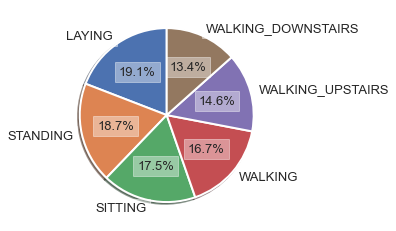

In [34]:
sizes = [laying['ActivityName'].count(), standing['ActivityName'].count(), sitting['ActivityName'].count(), walking['ActivityName'].count(), walking_upstairs['ActivityName'].count(), walking_downstairs['ActivityName'].count()]
ax1 = sns.set_theme(style='darkgrid')
labels = 'LAYING', 'STANDING','SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={'linewidth':2}, textprops=dict(fontstyle='normal',fontsize=13, bbox=dict(facecolor='white',alpha=0.4)))
plt.show()

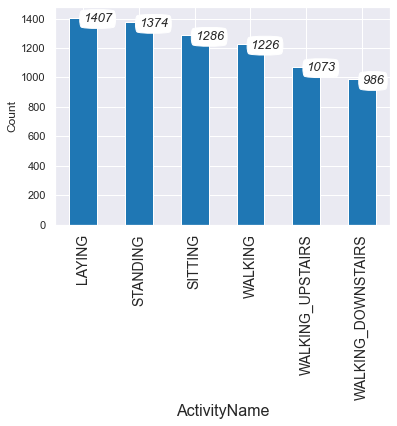

In [35]:
df_train['ActivityName'].value_counts().plot(kind='bar', colormap='tab10')
sns.set_theme(style="darkgrid")
plt.xlabel('ActivityName', fontsize=16)
plt.ylabel("Count")
plt.xticks(fontsize=16, rotation=90)
plt.xticks([0, 1, 2, 3, 4, 5], ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], fontsize=14, rotation=90)

for v in range(0,6):
    plt.text(v, df_train['ActivityName'].value_counts()[v], (df_train['ActivityName'].value_counts()[v]), fontstyle = 'italic', 
         fontsize = 13, bbox=dict(facecolor='white', boxstyle = 'round4'), va = 'center_baseline');
plt.show()

#### Subject

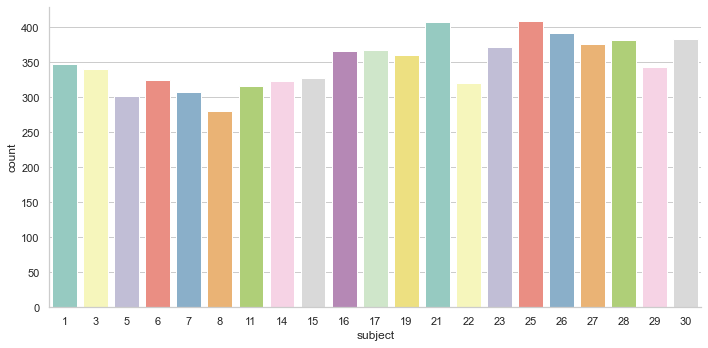

In [36]:
# Training set
sns.set_theme(style="whitegrid")
sns.catplot(x='subject', kind='count',palette="Set3", data=df_train, aspect=2)

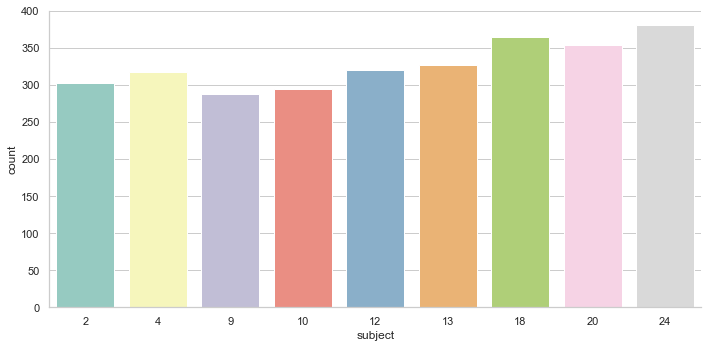

In [69]:
# Test set
sns.set_theme(style="whitegrid")
sns.catplot(x='subject', kind='count',palette="Set3", data=df_test, aspect=2)

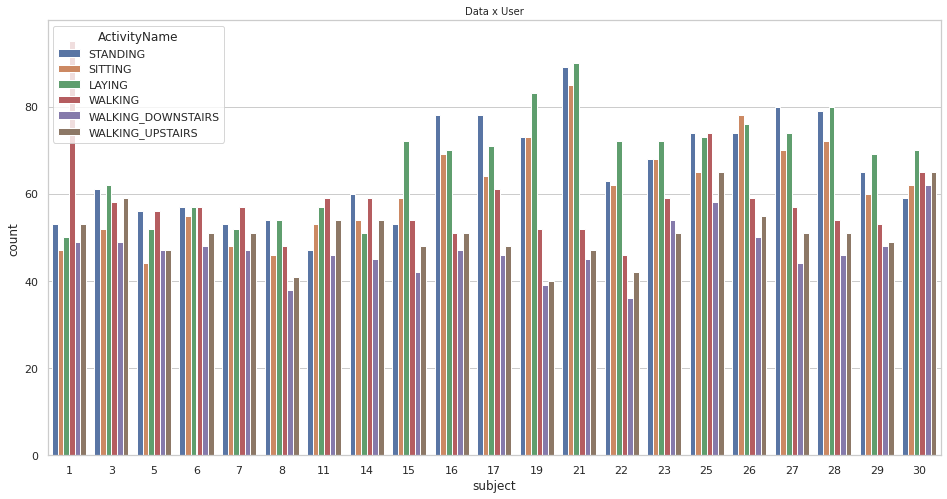

In [37]:
# Subject (training set) x Target variable
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data x User', fontsize=10)
sns.countplot(x='subject',hue='ActivityName', data = df_train)
plt.show()

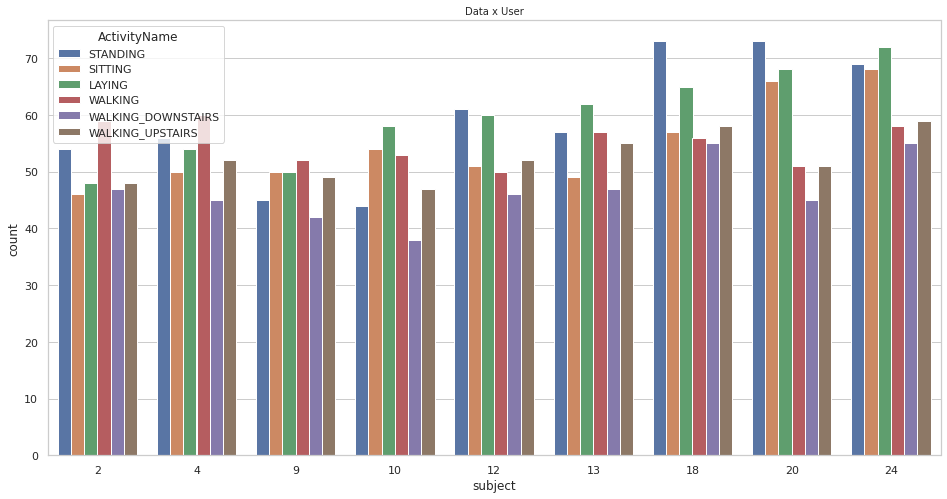

In [70]:
# Subject (test set) x Target variable
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data x User', fontsize=10)
sns.countplot(x='subject',hue='ActivityName', data = df_test)
plt.show()

In [38]:
# Crosstab subject x ActivityName
ctabsubject_activityname = pd.crosstab(df_train['subject'], df_train["ActivityName"])
ctabsubject_activityname

ActivityName,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [39]:
ctabsubject_activityname_norm = ctabsubject_activityname.div(ctabsubject_activityname.sum(1).astype(float), axis=0)
ctabsubject_activityname_norm

ActivityName,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,0.144092,0.135447,0.152738,0.273775,0.141210,0.152738
3,0.181818,0.152493,0.178886,0.170088,0.143695,0.173021
5,0.172185,0.145695,0.185430,0.185430,0.155629,0.155629
6,0.175385,0.169231,0.175385,0.175385,0.147692,0.156923
7,0.168831,0.155844,0.172078,0.185065,0.152597,0.165584
8,0.192171,0.163701,0.192171,0.170819,0.135231,0.145907
11,0.180380,0.167722,0.148734,0.186709,0.145570,0.170886
14,0.157895,0.167183,0.185759,0.182663,0.139319,0.167183
15,0.219512,0.179878,0.161585,0.164634,0.128049,0.146341


#### Continuous variables

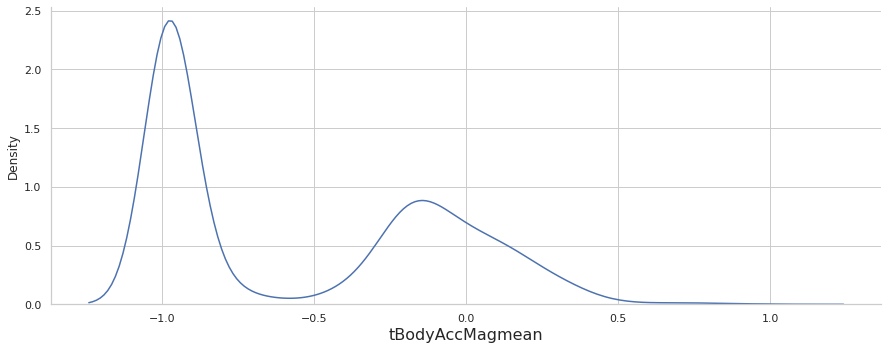

In [40]:
# tBodyAccMagmean
sns.displot(data=df_train, x="tBodyAccMagmean", kind="kde", aspect= 2.5)
plt.xlabel('tBodyAccMagmean', fontsize=16)
plt.show()

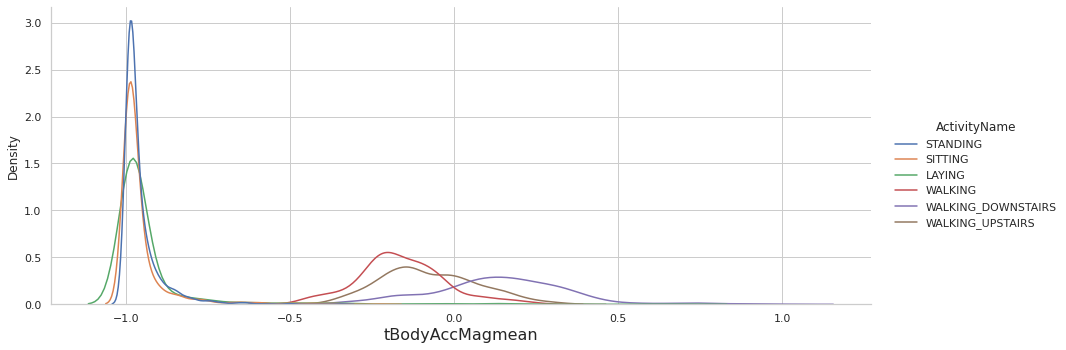

In [41]:
# tBodyAccMagmean x ActivityName
sns.displot(data=df_train, x="tBodyAccMagmean", hue="ActivityName", kind="kde", aspect= 2.5)
plt.xlabel('tBodyAccMagmean', fontsize=16)
plt.show()

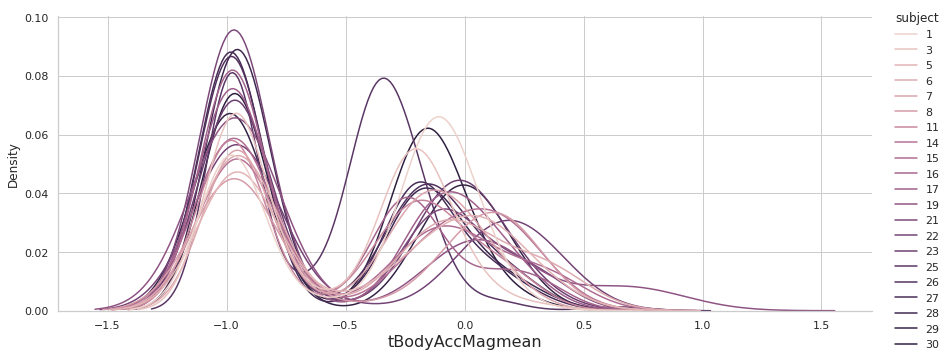

In [42]:
# tBodyAccMagmean x subject
sns.displot(data=df_train, x="tBodyAccMagmean", hue="subject", kind="kde", aspect= 2.5)
plt.xlabel('tBodyAccMagmean', fontsize=16)
plt.show()

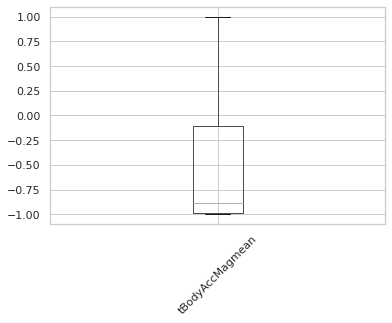

In [43]:
# Boxplot tBodyAccMagmean
boxplot = df_train.boxplot(column=['tBodyAccMagmean'], rot=45)

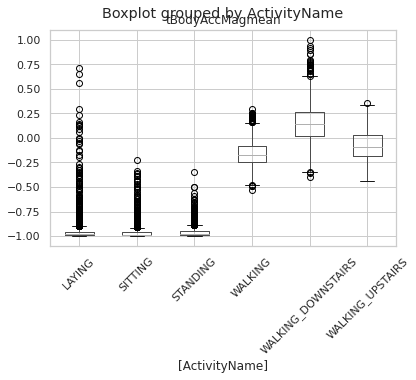

In [44]:
# Boxplot tBodyAccMagmean x ActivityName
boxplot = df_train.boxplot(column=['tBodyAccMagmean'], by=['ActivityName'], rot=45)

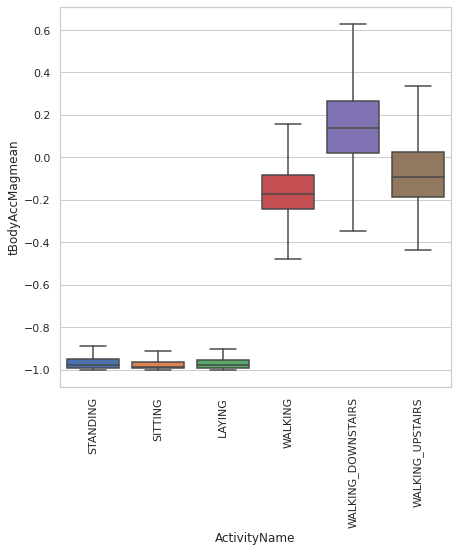

In [45]:
# Boxplot tBodyAccMagmean x Activityname
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=df_train, showfliers=False, saturation=1)
plt.xticks(rotation=90)
plt.show()

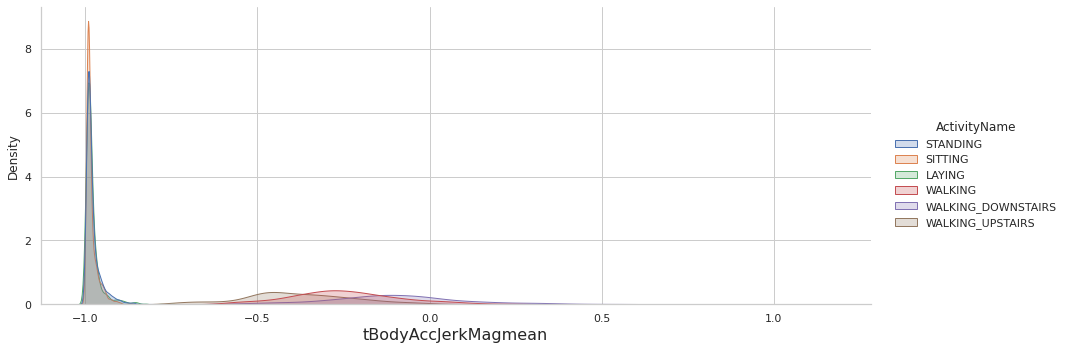

In [46]:
# tBodyAccJerkMagmean x Activityname
sns.displot(data=df_train, x="tBodyAccJerkMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('tBodyAccJerkMagmean', fontsize=16)
plt.show()

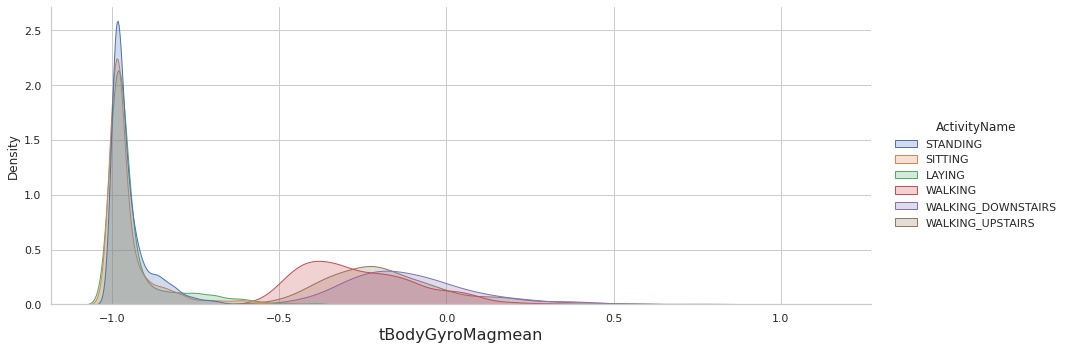

In [47]:
# tBodyGyroMagmean x Activityname
sns.displot(data=df_train, x="tBodyGyroMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('tBodyGyroMagmean', fontsize=16)
plt.show()

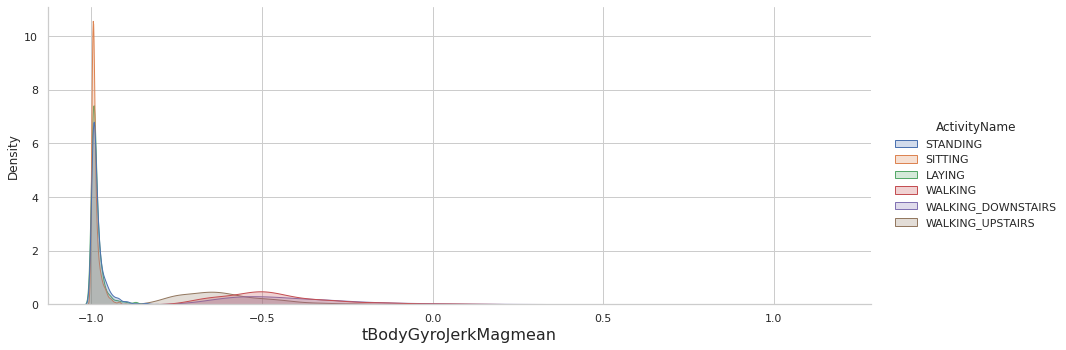

In [48]:
# tBodyGyroJerkMagmean x Activityname
sns.displot(data=df_train, x="tBodyGyroJerkMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('tBodyGyroJerkMagmean', fontsize=16)
plt.show()

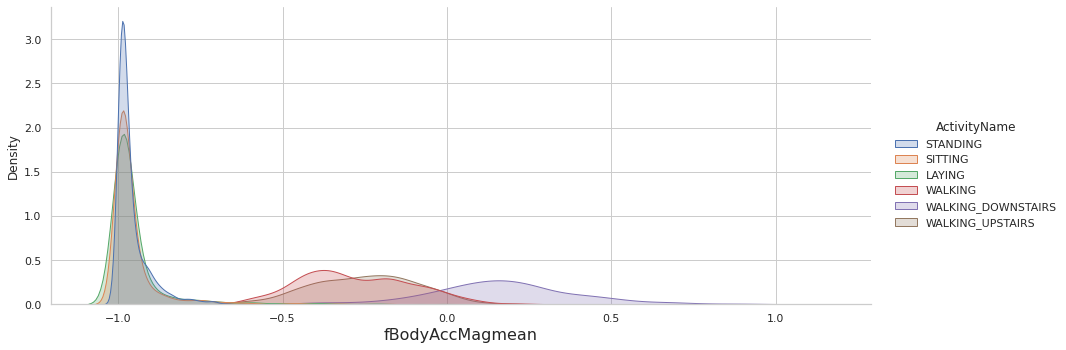

In [49]:
# fBodyAccMagmean x Activityname
sns.displot(data=df_train, x="fBodyAccMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('fBodyAccMagmean', fontsize=16)
plt.show()

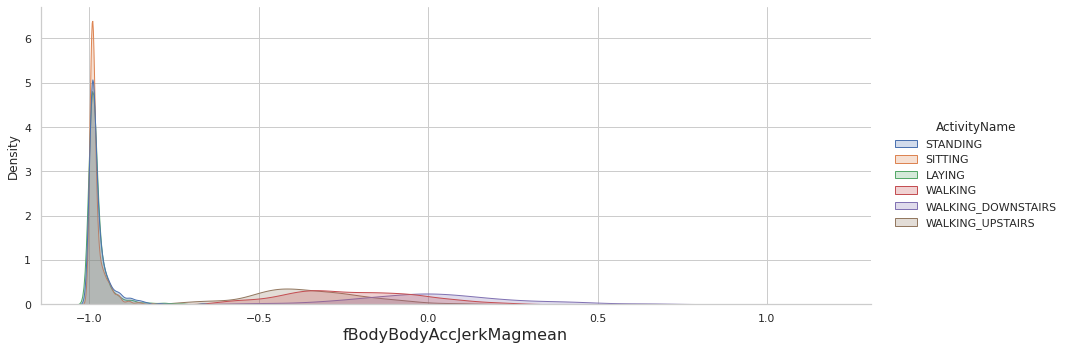

In [50]:
# fBodyBodyAccJerkMagmean x Activityname
sns.displot(data=df_train, x="fBodyBodyAccJerkMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('fBodyBodyAccJerkMagmean', fontsize=16)
plt.show()

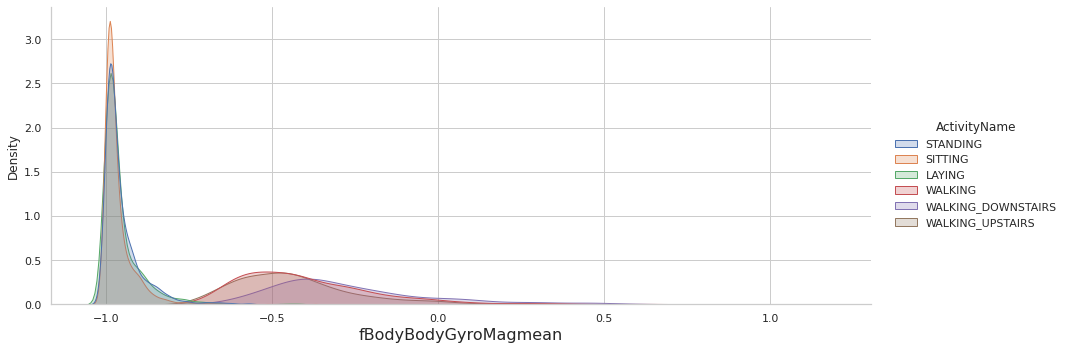

In [51]:
# fBodyBodyGyroMagmean x Activityname
sns.displot(data=df_train, x="fBodyBodyGyroMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('fBodyBodyGyroMagmean', fontsize=16)
plt.show()

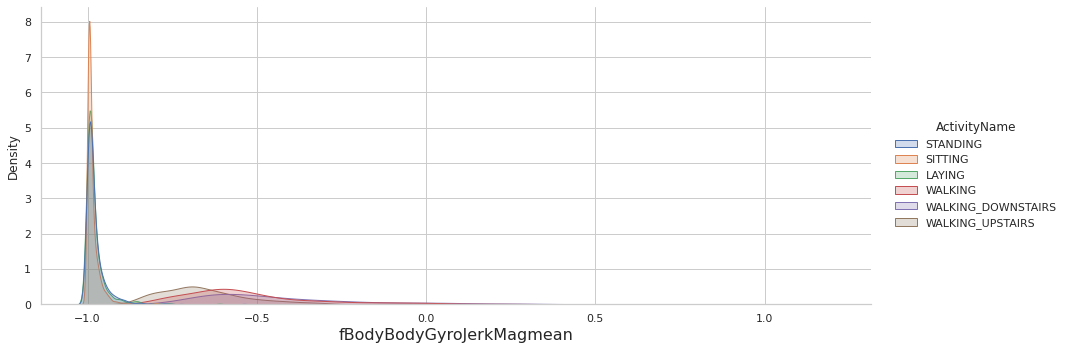

In [52]:
# fBodyBodyGyroJerkMagmean x Activityname
sns.displot(data=df_train, x="fBodyBodyGyroJerkMagmean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('fBodyBodyGyroJerkMagmean', fontsize=16)
plt.show()

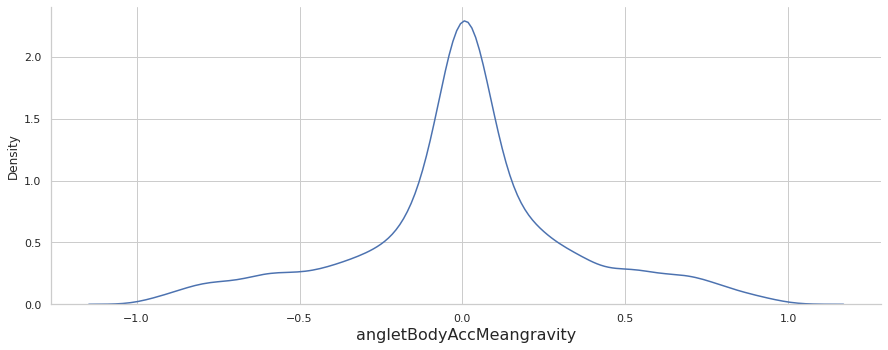

In [53]:
# angletBodyAccMeangravity
sns.displot(data=df_train, x="angletBodyAccMeangravity", kind="kde", aspect= 2.5)
plt.xlabel('angletBodyAccMeangravity', fontsize=16)
plt.show()

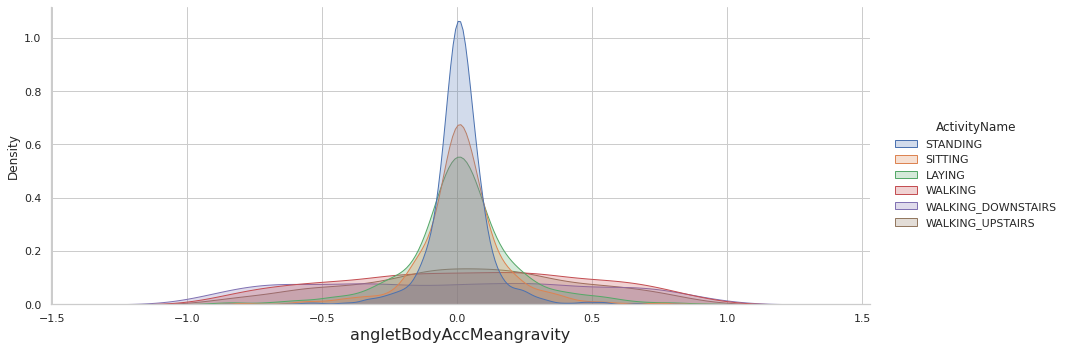

In [54]:
# angletBodyAccMeangravity x Activityname
sns.displot(data=df_train, x="angletBodyAccMeangravity", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angletBodyAccMeangravity', fontsize=16)
plt.show()

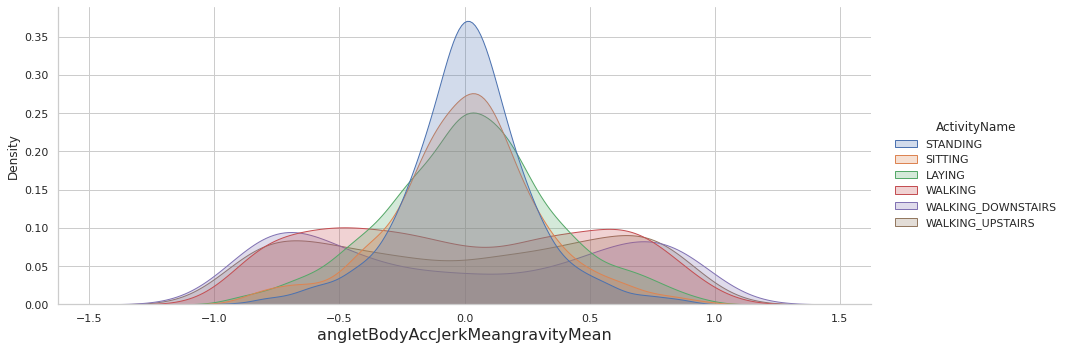

In [55]:
# angletBodyAccJerkMeangravityMean x Activityname
sns.displot(data=df_train, x="angletBodyAccJerkMeangravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angletBodyAccJerkMeangravityMean', fontsize=16)
plt.show()

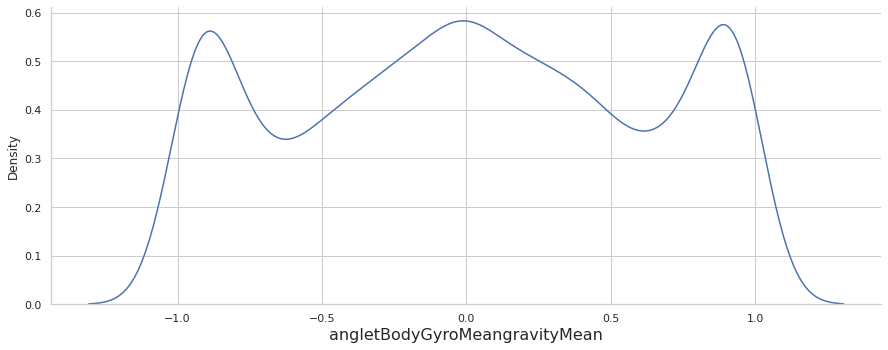

In [56]:
# angletBodyGyroMeangravityMean
sns.displot(data=df_train, x="angletBodyGyroMeangravityMean", kind="kde", aspect= 2.5)
plt.xlabel('angletBodyGyroMeangravityMean', fontsize=16)
plt.show()

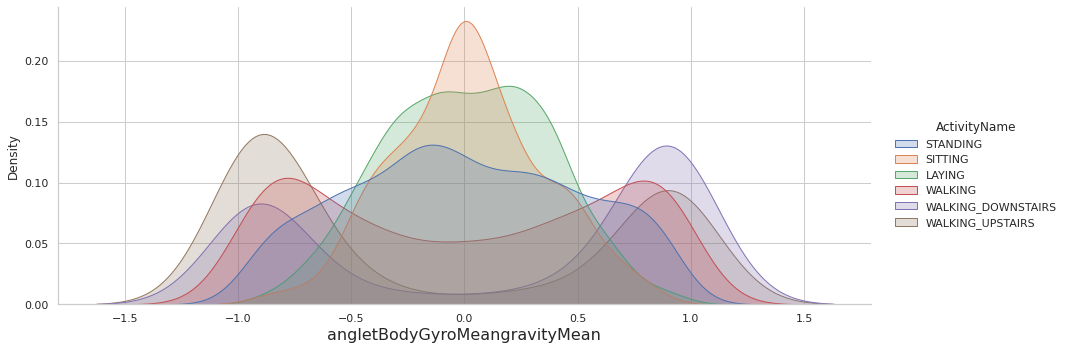

In [57]:
# angletBodyGyroMeangravityMean x Activityname
sns.displot(data=df_train, x="angletBodyGyroMeangravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angletBodyGyroMeangravityMean', fontsize=16)
plt.show()

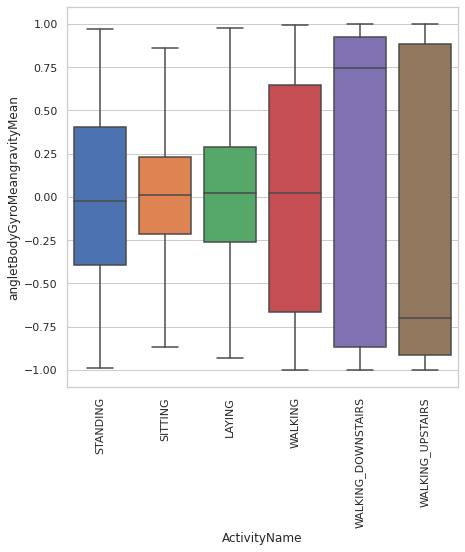

In [58]:
# Boxplot angletBodyGyroMeangravityMean x Activityname
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='angletBodyGyroMeangravityMean',data=df_train, showfliers=False, saturation=1)
plt.xticks(rotation=90)
plt.show()

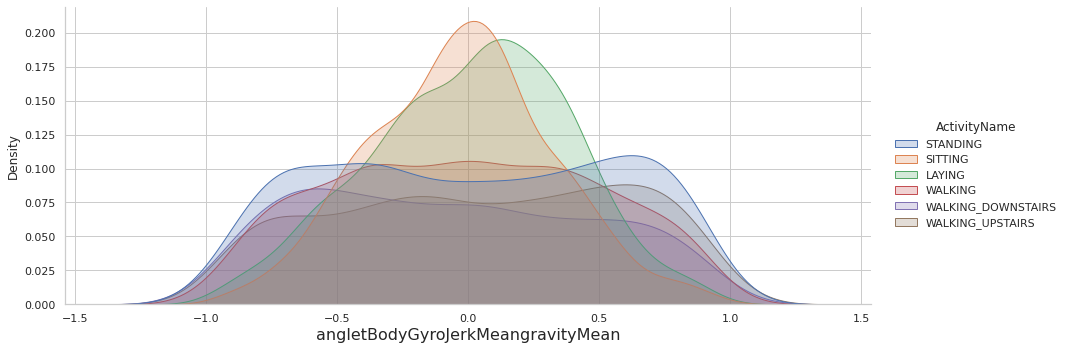

In [59]:
# angletBodyGyroJerkMeangravityMean x Activityname
sns.displot(data=df_train, x="angletBodyGyroJerkMeangravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angletBodyGyroJerkMeangravityMean', fontsize=16)
plt.show()

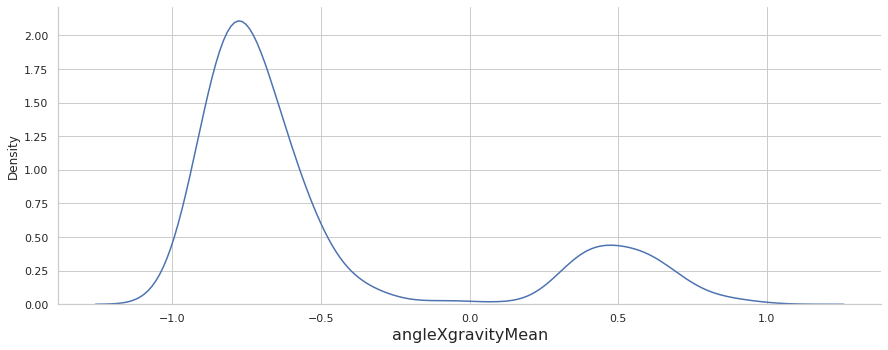

In [60]:
# angleXgravityMean
sns.displot(data=df_train, x="angleXgravityMean", kind="kde", aspect= 2.5)
plt.xlabel('angleXgravityMean', fontsize=16)
plt.show()

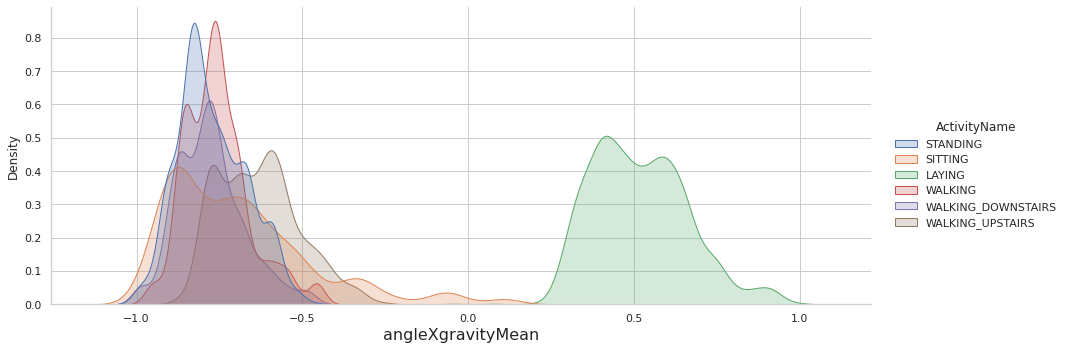

In [61]:
# angleXgravityMean x ActivityName
sns.displot(data=df_train, x="angleXgravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angleXgravityMean', fontsize=16)
plt.show()

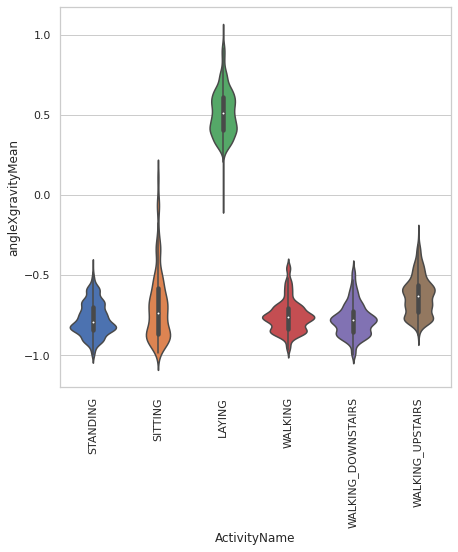

In [62]:
# Violinplot angleXgravityMean x Activityname
plt.figure(figsize=(7,7))
sns.violinplot(x='ActivityName', y='angleXgravityMean',data=df_train, saturation=1)
plt.xticks(rotation=90)
plt.show()

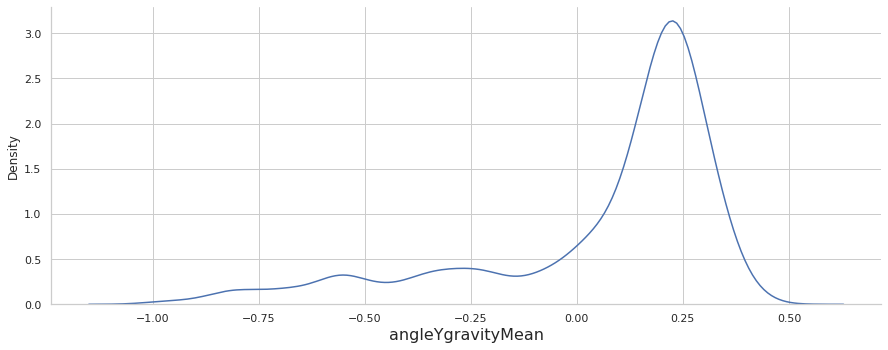

In [63]:
# angleYgravityMean
sns.displot(data=df_train, x="angleYgravityMean", kind="kde", aspect= 2.5)
plt.xlabel('angleYgravityMean', fontsize=16)
plt.show()

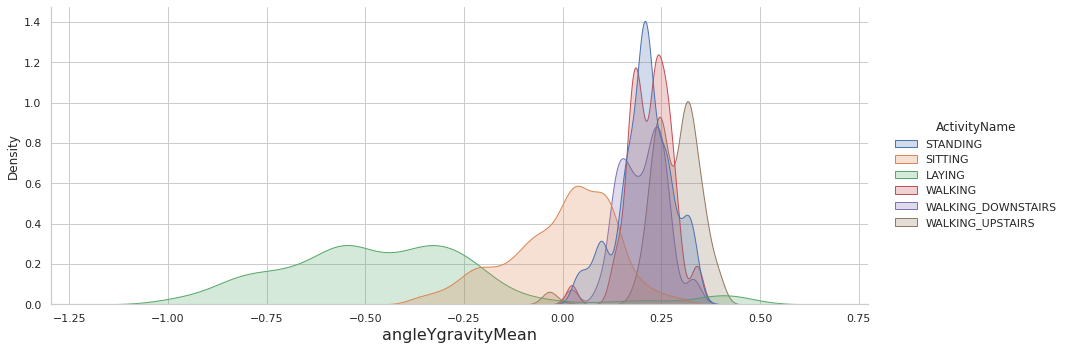

In [64]:
# angleYgravityMean x ActivityName
sns.displot(data=df_train, x="angleYgravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angleYgravityMean', fontsize=16)
plt.show()

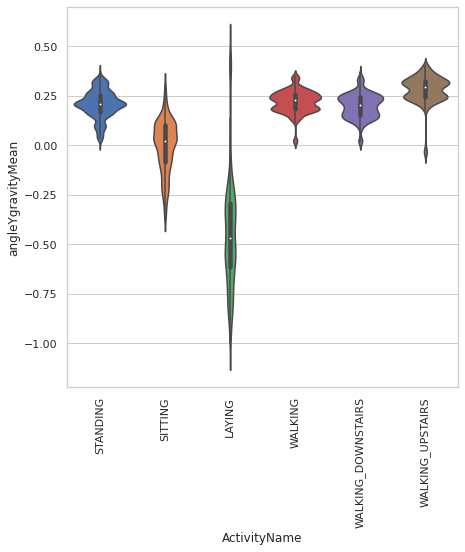

In [65]:
# Violinplot angleYgravityMean x Activityname
plt.figure(figsize=(7,7))
sns.violinplot(x='ActivityName', y='angleYgravityMean',data=df_train, saturation=1)
plt.xticks(rotation=90)
plt.show()

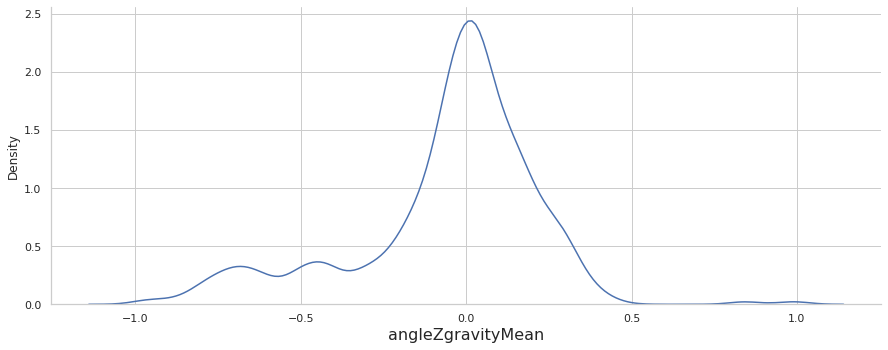

In [66]:
# angleZgravityMean
sns.displot(data=df_train, x="angleZgravityMean", kind="kde", aspect= 2.5)
plt.xlabel('angleZgravityMean', fontsize=16)
plt.show()

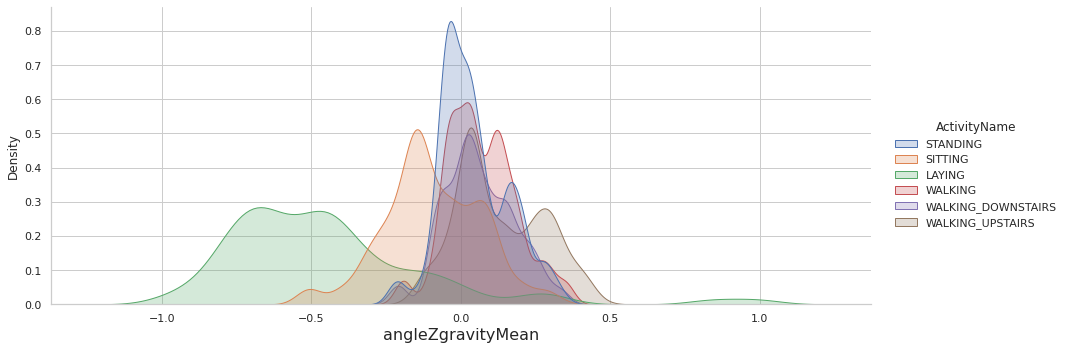

In [67]:
# angleZgravityMean x ActivityName
sns.displot(data=df_train, x="angleZgravityMean", hue="ActivityName", kind="kde", fill=True, aspect= 2.5)
plt.xlabel('angleZgravityMean', fontsize=16)
plt.show()

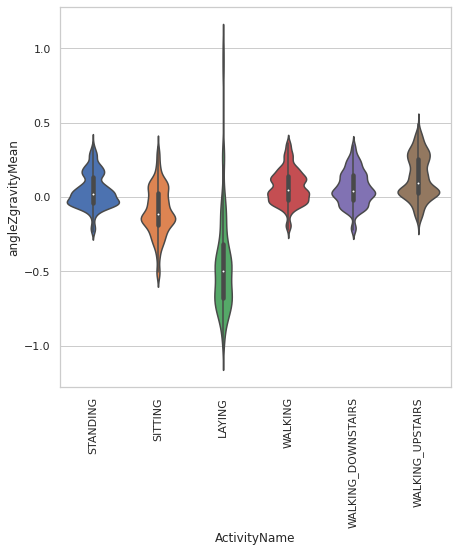

In [68]:
# Violinplot angleZgravityMean x Activityname
plt.figure(figsize=(7,7))
sns.violinplot(x='ActivityName', y='angleZgravityMean',data=df_train, saturation=1)
plt.xticks(rotation=90)
plt.show()